In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv("../bank-additional/bank-additional-full.csv", sep=";")

In [2]:
pd.options.display.max_columns = 30
data.shape

(41188, 21)

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data information

* Direct marketing campaign (phone calls) data of a portuguese bank institution.
* We want to predict if the client will or will not subscribe to a term deposit.
* Often more than one call was required in order to access if the product would be yes or no. So this implies **there may be rows representing multiple calls made to the same client.**

## Variables

Input variables:
### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
# Columns which we won't include in the model
cols_to_not_include = ['duration']

data.drop(cols_to_not_include, axis=1, inplace=True)

# k-nearest neigbours algorithm using holdout set

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

# Separating the target from the features
y = data['y']
data.drop('y', axis=1, inplace=True)
y = [1 if i == 'yes' else 0 for i in y] 

# Doing one-hot encoding
X = pd.get_dummies(data)

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=123, train_size=0.7)
print(f"We will train the model on {X_train.shape} number of calls")
print(f"We will validate the results on {X_val.shape} number of calls")

We will train the model on (28831, 62) number of calls
We will validate the results on (12357, 62) number of calls


In [6]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_val)

def print_validation_metrics(true_values, predictions):
    
    print(f"The Accuracy is {accuracy_score(true_values, predictions)}")
    
    print(f"The F1 score is {f1_score(true_values, predictions)}")
    
    print(f"The Precision is {precision_score(true_values, predictions)}")
    
    print(f"The Recall is {recall_score(true_values, predictions)}")
    
    print(f"The Area under the ROC curve is {roc_auc_score(true_values, predictions)}")
    
    return confusion_matrix(true_values, predictions)

knn_conf_mat = print_validation_metrics(y_val, knn_preds)

The Accuracy is 0.88864611151574
The F1 score is 0.3682277318640954
The Precision is 0.5127877237851662
The Recall is 0.28724928366762176
The Area under the ROC curve is 0.6262448407207738


In [7]:
knn_conf_mat

array([[10580,   381],
       [  995,   401]], dtype=int64)

[Text(0,0.5,'Not buying'), Text(0,1.5,'Buying')]

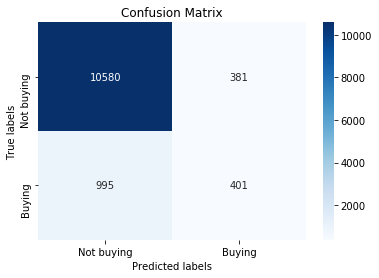

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

ax = sns.heatmap(knn_conf_mat, annot=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Not buying', 'Buying']); ax.yaxis.set_ticklabels(['Not buying', 'Buying'])

## Same kNN model with cross validation

In [10]:
from sklearn.model_selection import cross_validate

scoring = ['precision', 'recall', 'f1', 'accuracy']
cv_results = cross_validate(knn_model, X, y, cv=5, scoring=scoring, return_train_score=False)

C:\Users\cgokh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cgokh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


* Since data has 11% positives, while creating folds, train data of some folds are not having enough 1s and hence the predictions are all 0 and hence the precision, recall and f1 score are getting screwed.

In [11]:
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_precision', 'test_recall', 'test_f1', 'test_accuracy'])

In [12]:
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.head()

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
0,1.959897,12.624755,0.000000,0.000000,0.000000,0.887351
1,2.262723,10.965725,0.001233,0.004310,0.001918,0.494538
2,2.044811,9.394623,0.017241,0.016164,0.016685,0.785385
3,1.894916,14.332797,0.010235,0.050647,0.017029,0.341265
4,1.962877,13.048530,0.171756,1.000000,0.293161,0.456720


In [58]:
y.count(1)/len(y)

0.11265417111780131

### Bias-variance trade off

* Training error same as validation error --> HIGH BIAS
* Validation error way worst than training error --> HIGH VARIANCE
* Validation error a little bad than training error but not abysmally bad --> SWEET SPOT i.e. best model